In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

## Load Data

In [2]:
data1 = pd.read_csv(
    r"C:\github\ADL\adl_german_news\crawler and data\src\preprocess data\fully_labelled_data\finished_data.csv"
)
data1 = data1.rename(
    columns={
        "content_title": "title",
        "content_description": "description",
        "content_body": "body",
    }
)
data1

,Unnamed: 0,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label
0,0,bild,https://www.bild.de/politik/inland/politik-inl...,"spd, fdp, umweltschutz, christian lindner",2024-02-01,2024-02-01,2024-10-20,NaN,BILD,"FDP, die Gruenen, SPD, Lindner Christian, Djir...",Naechster Ampel-Zoff: FDP stoppt Lieferketten-...,Naechster Keil zwischen den Ampel-Parteien! Zw...,Naechster Keil zwischen den Ampel-Parteien! D...,0.0,0.0,0.0,1.0,2326.0,False
1,1,bild,https://www.bild.de/politik/inland/politik-inl...,"migration, rki, spd, cdu",2022-06-18,2022-06-18,2024-10-20,"Oliver Grothmann, Stephan Kuerthy, Michael Eng...",NaN,"Berlin, Organisiertes Verbrechen, Bushido, Ras...",Aufschrei der Anstaendigen - Jetzt sprechen di...,"Es reicht das sagen immer mehr von denen, die...",Es rumort unter Deutschlands Buergern. Es rei...,0.0,1.0,1.0,0.0,4146.0,False
2,2,bild,https://www.bild.de/politik/inland/politik-inl...,"spd, inflation, cdu",2023-05-11,2023-05-11,2024-10-20,Karina Moessbauer,NaN,"Bundeswehr, texttospeech",Verteidigungsministerium sieht kein Problem: B...,Die Bundeswehr bestellt neue Loeschfahrzeuge ...,"Verteidigungsminister Boris Pistorius (63, SPD...",0.0,0.0,0.0,1.0,2497.0,False
3,3,bild,https://www.bild.de/politik/inland/politik-inl...,"migration, integration, grenzen, spd, cdu",2023-04-08,2023-04-08,2024-10-20,Zara Riffler und Daniela Pfad,NaN,"innenministerium, Politik, Politik-Inland, mig...",Faeser riskiert den Zusammenhalt! Landraete-Au...,Nachdem die Bundesinnenministerin sich gegen m...,Wirbel um Aussagen von Bundesinnenministerin N...,0.0,0.0,0.0,1.0,3806.0,False
4,4,bild,https://www.bild.de/politik/kolumnen/kolumne/s...,"spd, verschwoerungstheorien, olaf scholz",2022-04-18,2022-04-18,2024-10-20,Paul Ronzheimer,NaN,"Russland, Ukraine, putin wladimir, Scholz Olaf...","Kommentar: Schweigen zu Kreml-Gerd, Wut auf Bo...","Die SPD schweigt zu Gerhard Schroeder, ist abe...",Die kalte Selbstgerechtigkeit einiger SPD-Poli...,0.0,0.0,1.0,1.0,2642.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,5104,welt,https://www.welt.de/kmpkt/article244742914/Kal...,"sp, ss, ns",2023-06-26,2023-06-26,2024-10-20,NaN,NaN,"kmpkt, Tiefsee, Tiefseeexpeditionen, Kalmare, ...",Kalmar im Atlantik: Diese Kreatur erinnert an ...,"In der Tiefsee schwimmt eine Kreatur, die laut...","In der Tiefsee schwimmt eine Kreatur, die laut...",0.0,0.0,0.0,1.0,2866.0,False
5105,5105,welt,https://www.welt.de/iconist/unterwegs/article2...,"sp, corona, lockdown, ns, spo, pandemie, ss",2023-12-12,2023-12-12,2024-10-20,NaN,NaN,"Hinrichs-Per, Dorfportraets, Kommunen, Rekorde...",Die zehn kuriosesten Doerfer Deutschlands - Ei...,"Mehrere Meter unter dem Meeresspiegel, tausend...","Mehrere Meter unter dem Meeresspiegel, tausend...",0.0,0.0,0.0,1.0,3686.0,False
5106,5106,welt,https://www.welt.de/wirtschaft/article24486286...,"sp, ns, spo, tesla, schi, demo, ss",2023-04-18,2023-04-18,2024-10-20,NaN,NaN,"Newsteam, Kuenstliche Intelligenz (KI), Musk, ...",Tucker Carlson: Elon Musk will mit TruthGPT di...,Im TV Sender Fox News hat Elon Musk seine Plae...,Im TV Sender Fox News hat Elon Musk seine Plae...,0.0,0.0,0.0,1.0,2912.0,False
5107,5107,welt,https://www.welt.de/iconist/maenner/article222...,"christ, sp, ns, homeoffice, ss",2020-12-26,2023-04-14,2024-10-20,NaN,NaN,"Herrenmode, Bekleidungsindustrie, Cassier-Phil...",Shaping new tomorrow: Diese Daenen machen Mode...,"Bequem, nachhaltig und stylish die Anprueche ...","Bequem, nachhaltig und stylish die Anprueche ...",0.0,0.0,1.0,0.0,3647.0,False


In [3]:
data2 = pd.read_csv(
    r"C:\github\ADL\adl_german_news\crawler and data\src\preprocess data\fully_labelled_data\labelled_data_finished.csv"
)
data2

,Unnamed: 0,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label,label
0,0,bild,https://www.bild.de/politik/ausland/politik-au...,"linke, migration, csu, cdu",2022-06-15,2022-06-15,2024-10-20,Filipp Piatov und Ralf Schuler,NaN,NaN,Sie verspottete Deutsche als Kartoffeln: Aktiv...,Schon wieder sorgt eine Personalentscheidung d...,Schon wieder sorgt eine Personalentscheidung d...,1.0,1.0,1.0,0.0,3574.0,True,"[1, 1, 1, 0]"
1,1,bild,https://www.bild.de/politik/ausland/politik-au...,israel,2023-11-10,2023-11-10,2024-10-20,"P. Tiede, A. Link und H.-J. Vehlewald",NaN,NaN,Reporter als Terror-Helfer: Die perfide Propag...,"Es ist der 7. Oktober 2023. Der Tag, der alles...","Es ist der 7. Oktober 2023. Der Tag, der alles...",1.0,1.0,0.0,0.0,5226.0,True,"[1, 1, 0, 0]"
2,2,bild,https://www.bild.de/politik/inland/politik-inl...,"fdp, csu, spd, cdu, afd, annalena baerbock, ch...",2023-06-19,2023-06-19,2024-10-20,Filipp Piatov,NaN,"CDU, CSU, die Gruenen, SPD, Wuest Hendrik, Mer...",Streit in der CDU: Umfrage-Schlacht zwischen M...,In der CDU liegen die Nerven blank! Es tobt ei...,In der CDU liegen die Nerven blank! Spaetesten...,0.0,1.0,0.0,0.0,3071.0,True,"[0, 1, 0, 0]"
3,3,bild,https://www.bild.de/politik/ausland/politik-au...,"israel, spd, olaf scholz",2023-10-30,2023-10-30,2024-10-20,NaN,BILD,"Gaza-Streifen, Gaza, Israel, Hamas, Nahost-Kon...",Shani Louk ermordet Scholz: Zeigt die ganze B...,Shani Louk wurde barbarisch ermordet. Das best...,Es ist das pure Grauen. Am 7. Oktober verschle...,0.0,0.0,0.0,1.0,2655.0,True,"[0, 0, 0, 1]"
4,4,bild,https://www.bild.de/regional/leipzig/leipzig-n...,"abschiebung, migration, cdu",2023-11-09,2023-11-09,2024-10-20,KARL KEIM,NaN,"Tunesien, Georgien, Sachsen, asylrecht, Schust...",Sachsen: Nur jede dritte Abschiebung findet wi...,In Sachsen klappt nur jede dritte Abschiebung....,Leipzig In Sachsen wurden bisher in diesem Ja...,0.0,0.0,0.0,1.0,2447.0,True,"[0, 0, 0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,336,welt,https://www.welt.de/politik/ausland/article242...,"krieg, christ, ss, sp, ukraine, ns, spo, nazi,...",2022-12-12,2022-12-12,2024-10-20,NaN,NaN,"Newsteam, Russland-Ukraine-Krieg (24.2.2022), ...",Ukraine-News ++ Ukraines Verteidigungsminister...,Laut dem ukrainischen Verteidigungsminister bi...,Laut dem ukrainischen Verteidigungsminister bi...,0.0,0.0,0.0,1.0,21564.0,True,"[0, 0, 0, 1]"
337,337,welt,https://www.welt.de/politik/deutschland/articl...,"sp, terror, ns, spd, schi, rechtsextremismus, ss",2022-12-13,2022-12-13,2024-10-20,NaN,NaN,"Newsteam, Wehrbeauftragte, Hoegl, Eva, Reichsb...",Wehrbeauftragte fordert haerteres Vorgehen geg...,Nach der Razzia gegen ein mutmassliches Terror...,Nach der Razzia gegen ein mutmassliches Terror...,0.0,0.0,0.0,1.0,972.0,True,"[0, 0, 0, 1]"
338,338,welt,https://www.welt.de/politik/ausland/article242...,"krieg, sp, ukraine, ns, spd, rki, schi, ss, rn...",2022-12-10,2022-12-10,2024-10-20,NaN,NaN,"Newsteam, Leopard 2, Russland-Ukraine-Krieg (2...",Leopard 2: USA fuer Lieferung deutscher Kampfp...,Kanzler Scholz will moderne westliche Kampfpan...,Kanzler Scholz will moderne westliche Kampfpan...,0.0,0.0,0.0,1.0,2616.0,True,"[0, 0, 0, 1]"
339,339,welt,https://www.welt.de/politik/deutschland/articl...,"terror, ss, ns",2022-12-13,2022-12-13,2024-10-20,NaN,NaN,"Schindler-Frederik, Bundestag WELT, AfD, Razzi...",Reichsbuerger-Razzia: Ermittler finden 93 Waff...,Bei der bundesweiten Razzia gegen eine Reichsb...,Bei der bundesweiten Razzia gegen eine Reichsb...,0.0,0.0,0.0,1.0,1464.0,True,"[0, 0, 0, 1]"


concat all data

In [4]:
data = pd.concat([data2, data1])
data

,Unnamed: 0,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label,label
0,0,bild,https://www.bild.de/politik/ausland/politik-au...,"linke, migration, csu, cdu",2022-06-15,2022-06-15,2024-10-20,Filipp Piatov und Ralf Schuler,NaN,NaN,Sie verspottete Deutsche als Kartoffeln: Aktiv...,Schon wieder sorgt eine Personalentscheidung d...,Schon wieder sorgt eine Personalentscheidung d...,1.0,1.0,1.0,0.0,3574.0,True,"[1, 1, 1, 0]"
1,1,bild,https://www.bild.de/politik/ausland/politik-au...,israel,2023-11-10,2023-11-10,2024-10-20,"P. Tiede, A. Link und H.-J. Vehlewald",NaN,NaN,Reporter als Terror-Helfer: Die perfide Propag...,"Es ist der 7. Oktober 2023. Der Tag, der alles...","Es ist der 7. Oktober 2023. Der Tag, der alles...",1.0,1.0,0.0,0.0,5226.0,True,"[1, 1, 0, 0]"
2,2,bild,https://www.bild.de/politik/inland/politik-inl...,"fdp, csu, spd, cdu, afd, annalena baerbock, ch...",2023-06-19,2023-06-19,2024-10-20,Filipp Piatov,NaN,"CDU, CSU, die Gruenen, SPD, Wuest Hendrik, Mer...",Streit in der CDU: Umfrage-Schlacht zwischen M...,In der CDU liegen die Nerven blank! Es tobt ei...,In der CDU liegen die Nerven blank! Spaetesten...,0.0,1.0,0.0,0.0,3071.0,True,"[0, 1, 0, 0]"
3,3,bild,https://www.bild.de/politik/ausland/politik-au...,"israel, spd, olaf scholz",2023-10-30,2023-10-30,2024-10-20,NaN,BILD,"Gaza-Streifen, Gaza, Israel, Hamas, Nahost-Kon...",Shani Louk ermordet Scholz: Zeigt die ganze B...,Shani Louk wurde barbarisch ermordet. Das best...,Es ist das pure Grauen. Am 7. Oktober verschle...,0.0,0.0,0.0,1.0,2655.0,True,"[0, 0, 0, 1]"
4,4,bild,https://www.bild.de/regional/leipzig/leipzig-n...,"abschiebung, migration, cdu",2023-11-09,2023-11-09,2024-10-20,KARL KEIM,NaN,"Tunesien, Georgien, Sachsen, asylrecht, Schust...",Sachsen: Nur jede dritte Abschiebung findet wi...,In Sachsen klappt nur jede dritte Abschiebung....,Leipzig In Sachsen wurden bisher in diesem Ja...,0.0,0.0,0.0,1.0,2447.0,True,"[0, 0, 0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,5104,welt,https://www.welt.de/kmpkt/article244742914/Kal...,"sp, ss, ns",2023-06-26,2023-06-26,2024-10-20,NaN,NaN,"kmpkt, Tiefsee, Tiefseeexpeditionen, Kalmare, ...",Kalmar im Atlantik: Diese Kreatur erinnert an ...,"In der Tiefsee schwimmt eine Kreatur, die laut...","In der Tiefsee schwimmt eine Kreatur, die laut...",0.0,0.0,0.0,1.0,2866.0,False,NaN
5105,5105,welt,https://www.welt.de/iconist/unterwegs/article2...,"sp, corona, lockdown, ns, spo, pandemie, ss",2023-12-12,2023-12-12,2024-10-20,NaN,NaN,"Hinrichs-Per, Dorfportraets, Kommunen, Rekorde...",Die zehn kuriosesten Doerfer Deutschlands - Ei...,"Mehrere Meter unter dem Meeresspiegel, tausend...","Mehrere Meter unter dem Meeresspiegel, tausend...",0.0,0.0,0.0,1.0,3686.0,False,NaN
5106,5106,welt,https://www.welt.de/wirtschaft/article24486286...,"sp, ns, spo, tesla, schi, demo, ss",2023-04-18,2023-04-18,2024-10-20,NaN,NaN,"Newsteam, Kuenstliche Intelligenz (KI), Musk, ...",Tucker Carlson: Elon Musk will mit TruthGPT di...,Im TV Sender Fox News hat Elon Musk seine Plae...,Im TV Sender Fox News hat Elon Musk seine Plae...,0.0,0.0,0.0,1.0,2912.0,False,NaN
5107,5107,welt,https://www.welt.de/iconist/maenner/article222...,"christ, sp, ns, homeoffice, ss",2020-12-26,2023-04-14,2024-10-20,NaN,NaN,"Herrenmode, Bekleidungsindustrie, Cassier-Phil...",Shaping new tomorrow: Diese Daenen machen Mode...,"Bequem, nachhaltig und stylish die Anprueche ...","Bequem, nachhaltig und stylish die Anprueche ...",0.0,0.0,1.0,0.0,3647.0,False,NaN


In [7]:
# data = data.drop(["Unnamed: 0", "has_label", "label"], axis=1)
# data = data.rename(columns={
#     "Fake News": "fake news",
#     "Extreme bias": "extreme bias"})

# data.to_csv("german_fake_news_data.csv")
# data

,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,fake news,extreme bias,clickbait,credible,body_len
0,bild,https://www.bild.de/politik/ausland/politik-au...,"linke, migration, csu, cdu",2022-06-15,2022-06-15,2024-10-20,Filipp Piatov und Ralf Schuler,NaN,NaN,Sie verspottete Deutsche als Kartoffeln: Aktiv...,Schon wieder sorgt eine Personalentscheidung d...,Schon wieder sorgt eine Personalentscheidung d...,1.0,1.0,1.0,0.0,3574.0
1,bild,https://www.bild.de/politik/ausland/politik-au...,israel,2023-11-10,2023-11-10,2024-10-20,"P. Tiede, A. Link und H.-J. Vehlewald",NaN,NaN,Reporter als Terror-Helfer: Die perfide Propag...,"Es ist der 7. Oktober 2023. Der Tag, der alles...","Es ist der 7. Oktober 2023. Der Tag, der alles...",1.0,1.0,0.0,0.0,5226.0
2,bild,https://www.bild.de/politik/inland/politik-inl...,"fdp, csu, spd, cdu, afd, annalena baerbock, ch...",2023-06-19,2023-06-19,2024-10-20,Filipp Piatov,NaN,"CDU, CSU, die Gruenen, SPD, Wuest Hendrik, Mer...",Streit in der CDU: Umfrage-Schlacht zwischen M...,In der CDU liegen die Nerven blank! Es tobt ei...,In der CDU liegen die Nerven blank! Spaetesten...,0.0,1.0,0.0,0.0,3071.0
3,bild,https://www.bild.de/politik/ausland/politik-au...,"israel, spd, olaf scholz",2023-10-30,2023-10-30,2024-10-20,NaN,BILD,"Gaza-Streifen, Gaza, Israel, Hamas, Nahost-Kon...",Shani Louk ermordet Scholz: Zeigt die ganze B...,Shani Louk wurde barbarisch ermordet. Das best...,Es ist das pure Grauen. Am 7. Oktober verschle...,0.0,0.0,0.0,1.0,2655.0
4,bild,https://www.bild.de/regional/leipzig/leipzig-n...,"abschiebung, migration, cdu",2023-11-09,2023-11-09,2024-10-20,KARL KEIM,NaN,"Tunesien, Georgien, Sachsen, asylrecht, Schust...",Sachsen: Nur jede dritte Abschiebung findet wi...,In Sachsen klappt nur jede dritte Abschiebung....,Leipzig In Sachsen wurden bisher in diesem Ja...,0.0,0.0,0.0,1.0,2447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,welt,https://www.welt.de/kmpkt/article244742914/Kal...,"sp, ss, ns",2023-06-26,2023-06-26,2024-10-20,NaN,NaN,"kmpkt, Tiefsee, Tiefseeexpeditionen, Kalmare, ...",Kalmar im Atlantik: Diese Kreatur erinnert an ...,"In der Tiefsee schwimmt eine Kreatur, die laut...","In der Tiefsee schwimmt eine Kreatur, die laut...",0.0,0.0,0.0,1.0,2866.0
5105,welt,https://www.welt.de/iconist/unterwegs/article2...,"sp, corona, lockdown, ns, spo, pandemie, ss",2023-12-12,2023-12-12,2024-10-20,NaN,NaN,"Hinrichs-Per, Dorfportraets, Kommunen, Rekorde...",Die zehn kuriosesten Doerfer Deutschlands - Ei...,"Mehrere Meter unter dem Meeresspiegel, tausend...","Mehrere Meter unter dem Meeresspiegel, tausend...",0.0,0.0,0.0,1.0,3686.0
5106,welt,https://www.welt.de/wirtschaft/article24486286...,"sp, ns, spo, tesla, schi, demo, ss",2023-04-18,2023-04-18,2024-10-20,NaN,NaN,"Newsteam, Kuenstliche Intelligenz (KI), Musk, ...",Tucker Carlson: Elon Musk will mit TruthGPT di...,Im TV Sender Fox News hat Elon Musk seine Plae...,Im TV Sender Fox News hat Elon Musk seine Plae...,0.0,0.0,0.0,1.0,2912.0
5107,welt,https://www.welt.de/iconist/maenner/article222...,"christ, sp, ns, homeoffice, ss",2020-12-26,2023-04-14,2024-10-20,NaN,NaN,"Herrenmode, Bekleidungsindustrie, Cassier-Phil...",Shaping new tomorrow: Diese Daenen machen Mode...,"Bequem, nachhaltig und stylish die Anprueche ...","Bequem, nachhaltig und stylish die Anprueche ...",0.0,0.0,1.0,0.0,3647.0


In [8]:
#data.to_csv("german_fake_news_data.csv")

split the data

In [187]:
X = data[["title", "description", "body"]].apply(
    lambda row: " ".join(row.values.astype(str)), axis=1
)
y = data[["Fake News", "Extreme bias", "clickbait", "credible"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [188]:
labels = ["Fake News", "Extreme bias", "clickbait", "credible"]

In [189]:
y_train[labels].sum()

Fake News        125.0
Extreme bias     299.0
clickbait        275.0
credible        3955.0
dtype: float64

In [190]:
y_test[labels].sum()

Fake News        41.0
Extreme bias     87.0
clickbait        69.0
credible        972.0
dtype: float64

pre-process data

In [191]:
vectorizer = TfidfVectorizer(max_features=3000)  # must be same as val features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## DL on full data

In [192]:
input_shape = X_train_tfidf.shape[1]
num_labels = y_train.shape[1]

# model architecture
model = Sequential(
    [
        Dense(1024, input_shape=(input_shape,), activation="relu"),
        Dropout(0.5),
        Dense(512, activation="relu"),
        Dropout(0.3),
        Dense(256, activation="relu"),
        Dropout(0.3),
        Dense(num_labels, activation="sigmoid"),
    ]
)

# compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.00001),
    metrics=["accuracy"],
)

early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

# model summary
model.summary()

c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 1024)           │     3,073,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,730,180 (14.23 MB)

 Trainable params: 3,730,180 (14.23 MB)

 Non-trainable params: 0 (0.00 B)

In [193]:
history = model.fit(
    X_train_tfidf.toarray(),
    y_train.values,
    epochs=100,
    validation_split=0.4,
    callbacks=[early_stopping],
)

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4512 - loss: 0.6908 - val_accuracy: 0.8739 - val_loss: 0.6717
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8791 - loss: 0.6639 - val_accuracy: 0.8739 - val_loss: 0.6348
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8842 - loss: 0.6190 - val_accuracy: 0.8739 - val_loss: 0.5642
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8691 - loss: 0.5404 - val_accuracy: 0.8739 - val_loss: 0.4510
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8744 - loss: 0.4207 - val_accuracy: 0.8739 - val_loss: 0.3350
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8678 - loss: 0.3298 - val_accuracy: 0.8739 - val_loss: 0.2700
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8737 - loss: 0.2670 - val_accuracy: 0.8739 - val_loss: 0.2468
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8633 - loss: 0.2626 - val_accuracy: 0.

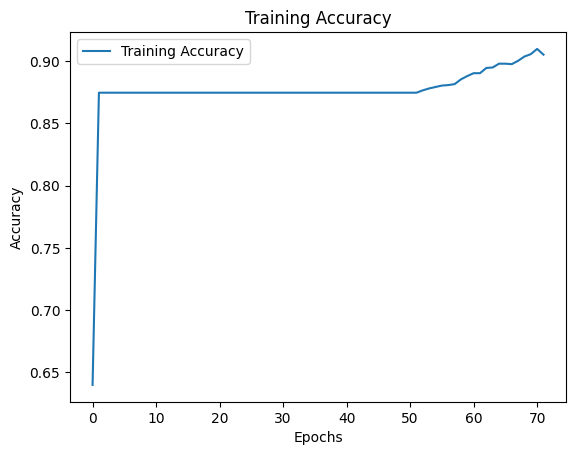

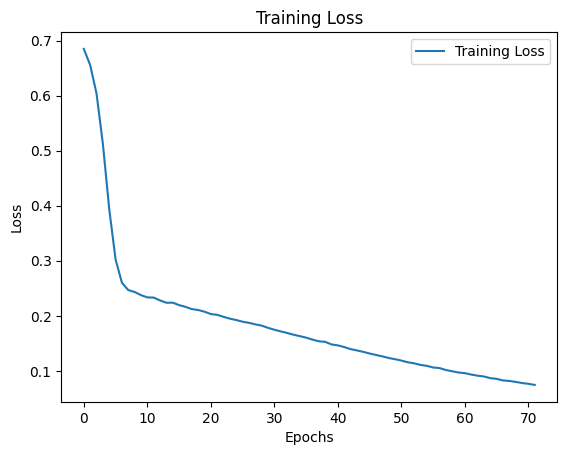

In [194]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Training Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [195]:
test_loss, test_accuracy = model.evaluate(X_test_tfidf.toarray(), y_test.values)
print(f"Test Accuracy= {round(test_accuracy,2)*100}%\n Test Loss= {round(test_loss,2)}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8618 - loss: 0.2133
Test Accuracy= 87.0%
 Test Loss= 0.18


In [196]:
test_pred = model.predict(X_test_tfidf.toarray())
report = classification_report(y_test.values, (test_pred > 0.5).astype(int))
print(report)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.50      0.01      0.02        87
           2       0.75      0.04      0.08        69
           3       0.91      1.00      0.95       972

   micro avg       0.91      0.83      0.87      1169
   macro avg       0.54      0.26      0.26      1169
weighted avg       0.84      0.83      0.80      1169
 samples avg       0.89      0.88      0.88      1169



c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [197]:
roc_auc = roc_auc_score(y_test.values, test_pred, average="micro")
print(f"ROC-AUC (Micro Average): {roc_auc}")

ROC-AUC (Micro Average): 0.9749849810161652


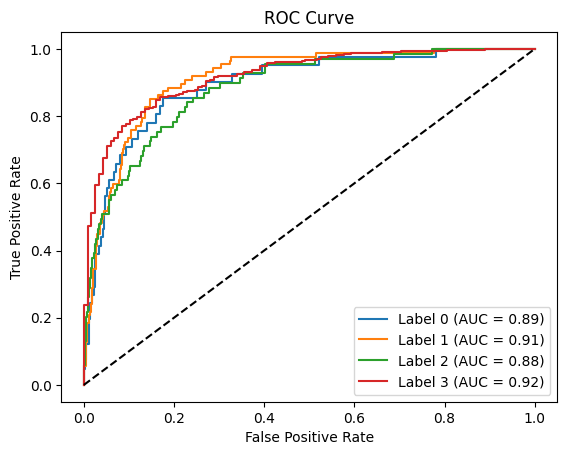

In [198]:
for i in range(num_labels):
    fpr, tpr, _ = roc_curve(y_test.values[:, i], test_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Label {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

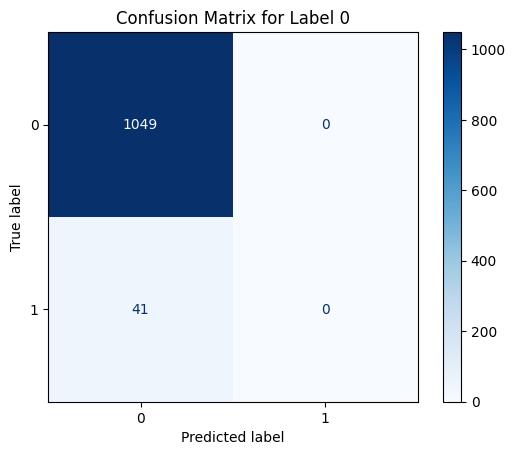

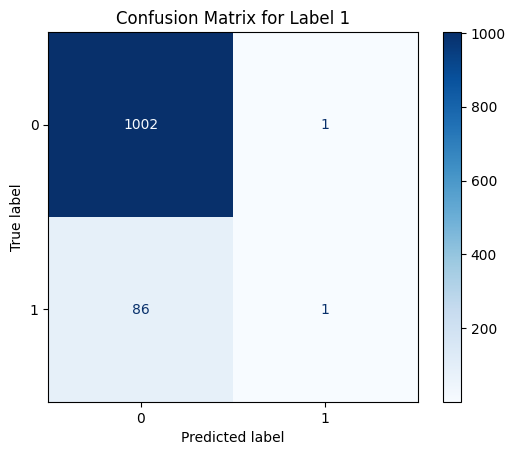

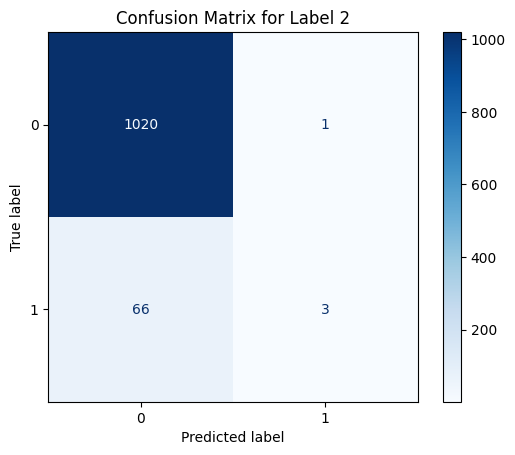

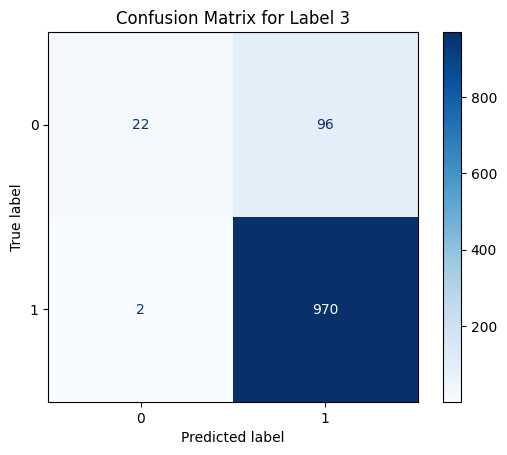

In [199]:
cm = multilabel_confusion_matrix(y_test.values, (test_pred > 0.5).astype(int))

for i, matrix in enumerate(cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[0, 1])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for Label {i}")
    plt.show()

## pre training on automated data, fine tuning on manual data

In [200]:
# auto data
data = pd.read_csv(
    r"C:\github\ADL\adl_german_news\crawler and data\src\preprocess data\fully_labelled_data\finished_data.csv"
)
data = data.rename(
    columns={
        "content_title": "title",
        "content_description": "description",
        "content_body": "body",
    }
)

X = data[["title", "description", "body"]].apply(
    lambda row: " ".join(row.values.astype(str)), axis=1
)
y = data[["Fake News", "Extreme bias", "clickbait", "credible"]]
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [201]:
# manually labelled
data2 = pd.read_csv(
    r"C:\github\ADL\adl_german_news\crawler and data\src\preprocess data\fully_labelled_data\labelled_data_finished.csv"
)
X = data2[["title", "description", "body"]].apply(
    lambda row: " ".join(row.values.astype(str)), axis=1
)
y = data2[["Fake News", "Extreme bias", "clickbait", "credible"]]
X_train_manual, X_test_manual, y_train_manual, y_test_manual = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [202]:
X_test_combined = pd.concat([X_test_auto, X_test_manual], axis=0).reset_index(drop=True)
y_test_combined = pd.concat([y_test_auto, y_test_manual], axis=0).reset_index(drop=True)

In [203]:
labels = ["Fake News", "Extreme bias", "clickbait", "credible"]
vectorizer = TfidfVectorizer(max_features=3000)  # must be same as val features
X_train_tfidf_auto = vectorizer.fit_transform(X_train_auto)
X_test_tfidf_auto = vectorizer.transform(X_test_auto)
X_train_tfidf_manual = vectorizer.fit_transform(X_train_manual)
X_test_tfidf_manual = vectorizer.transform(X_test_manual)
X_test_combined_tdidf = vectorizer.transform(X_test_combined)

In [204]:
input_shape = X_train_tfidf_auto.shape[1]
num_labels = y_train_auto.shape[1]


model = Sequential(
    [
        Dense(1024, input_shape=(input_shape,), activation="relu"),
        Dropout(0.5),
        Dense(512, activation="relu"),
        Dropout(0.3),
        Dense(256, activation="relu"),
        Dropout(0.3),
        Dense(num_labels, activation="sigmoid"),
    ]
)

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.000001),
    metrics=["accuracy"],
)

early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

model.summary()

print("\nPretraining the model on automatically labeled data...")
history_pretrain = model.fit(
    X_train_tfidf_auto,
    y_train_auto,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping],
)

c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 1024)           │     3,073,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,730,180 (14.23 MB)

 Trainable params: 3,730,180 (14.23 MB)

 Non-trainable params: 0 (0.00 B)


Pretraining the model on automatically labeled data...
Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.0735 - loss: 0.6982 - val_accuracy: 0.0795 - val_loss: 0.6941
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1432 - loss: 0.6949 - val_accuracy: 0.3619 - val_loss: 0.6912
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2357 - loss: 0.6921 - val_accuracy: 0.7164 - val_loss: 0.6883
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3668 - loss: 0.6889 - val_accuracy: 0.8667 - val_loss: 0.6854
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5095 - loss: 0.6861 - val_accuracy: 0.8924 - val_loss: 0.6824
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6602 - loss: 0.6826 - val_accuracy: 0.8949 - val_loss: 0.6793
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7650 - loss: 0.6793 - val_accuracy: 0.8949 - val_loss: 0.6760
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 3

In [205]:
model.save_weights("pretrained_model.weights.h5")
print("Pretrained weights saved as 'pretrained_model.h5'.")

model.load_weights("pretrained_model.weights.h5")
print("\nLoaded pretrained weights. Starting fine-tuning.")

base_model = model.layers[0]
base_model.trainable = False

print("\nStage 1: Fine-tuning with frozen base model.")
history_stage1 = model.fit(
    X_train_tfidf_manual,
    y_train_manual,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
    callbacks=[early_stopping],
)


base_model.trainable = True  # unfreeze 
print("\nStage 2: Fine-tuning with unfrozen base model.")
history_stage2 = model.fit(
    X_train_tfidf_manual,
    y_train_manual,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping],
)


print("Fine-tuning completed.")
model.save("fine_tuned_model.h5")
print("Fine-tuned model saved as 'fine_tuned_model.h5'.")

Pretrained weights saved as 'pretrained_model.h5'.

Loaded pretrained weights. Starting fine-tuning.

Stage 1: Fine-tuning with frozen base model.
Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5396 - loss: 0.6844 - val_accuracy: 0.6364 - val_loss: 0.6818
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5725 - loss: 0.6846 - val_accuracy: 0.6364 - val_loss: 0.6817
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5342 - loss: 0.6845 - val_accuracy: 0.6364 - val_loss: 0.6816
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5932 - loss: 0.6832 - val_accuracy: 0.6364 - val_loss: 0.6815
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5483 - loss: 0.6842 - val_accuracy: 0.6364 - val_loss: 0.6814

Stage 2: Fine-tuning with unfrozen base model.
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5881 - loss: 0.6840 - val_accuracy: 0.6364 - val_loss: 0.6817
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy:

Fine-tuning completed.
Fine-tuned model saved as 'fine_tuned_model.h5'.


The model stagnated. It can not really learn anymore from the data. It is probably not enough

In [206]:
y_pred_proba = model.predict(X_test_combined_tdidf)
y_pred = (y_pred_proba > 0.5).astype(
    int
) #binary pred

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [207]:
y_pred  # looks like it mostly assigns credible

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [208]:
loss, accuracy = model.evaluate(X_test_combined_tdidf, y_test_combined, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.6724
Test Accuracy: 0.8616


In [209]:
print("Classification Report:")
print(classification_report(y_test_combined, y_pred, target_names=labels))

Classification Report:
              precision    recall  f1-score   support

   Fake News       0.00      0.00      0.00        36
Extreme bias       0.00      0.00      0.00        81
   clickbait       0.00      0.00      0.00        73
    credible       0.89      1.00      0.94       970

   micro avg       0.89      0.84      0.86      1160
   macro avg       0.22      0.25      0.24      1160
weighted avg       0.74      0.84      0.79      1160
 samples avg       0.89      0.88      0.88      1160



c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

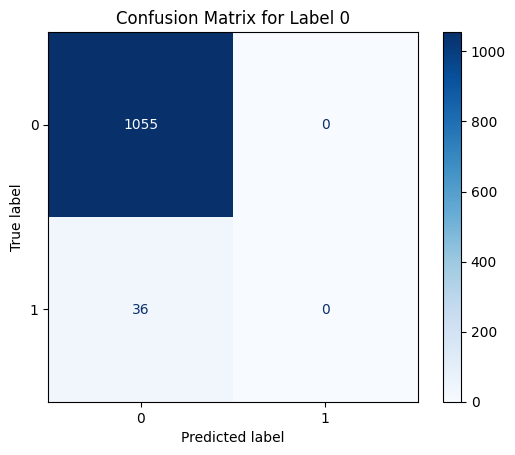

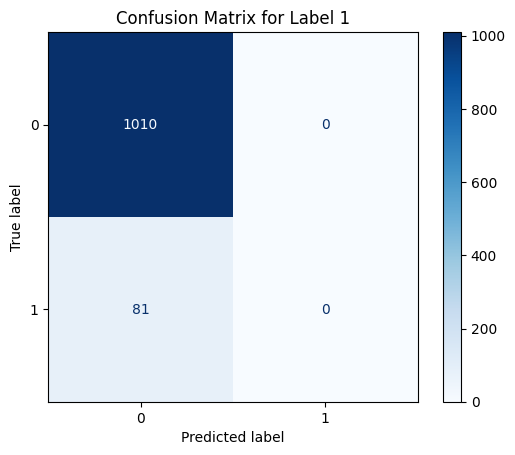

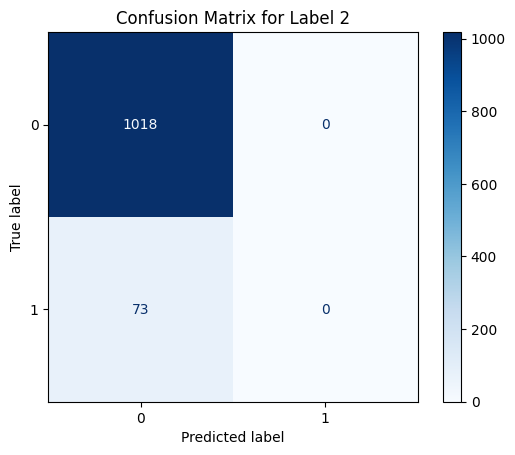

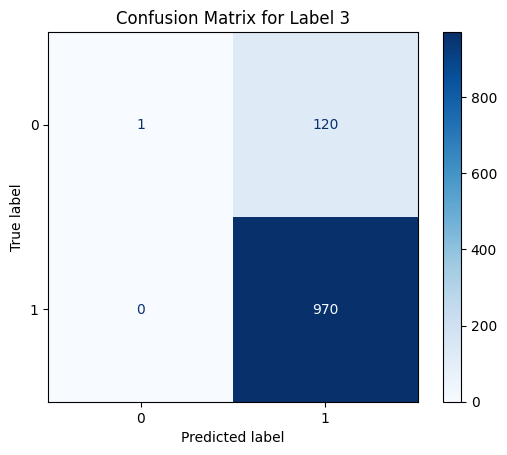

In [210]:
cm = multilabel_confusion_matrix(y_test_combined.values, (y_pred > 0.5).astype(int))

for i, matrix in enumerate(cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[0, 1])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for Label {i}")
    plt.show()

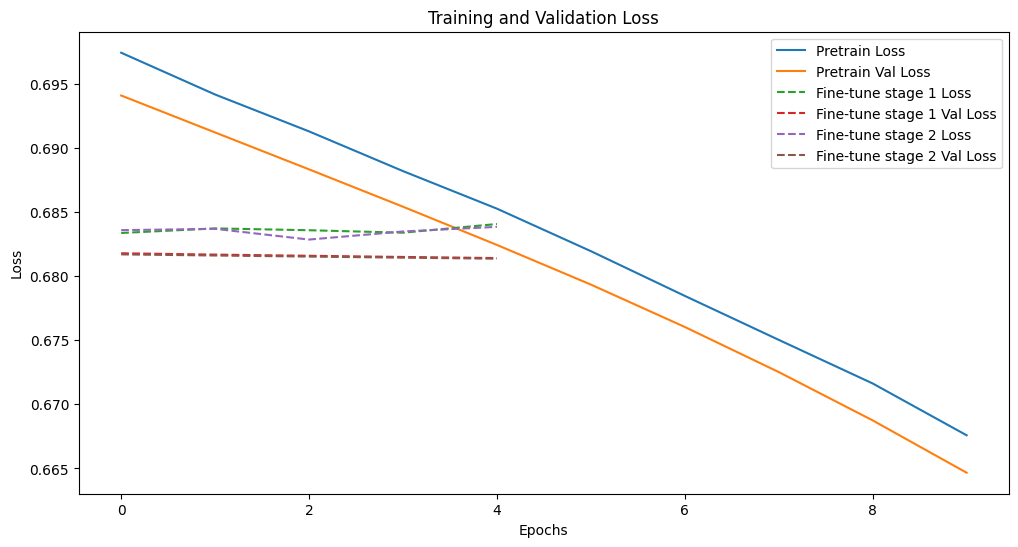

In [211]:
plt.figure(figsize=(12, 6))
plt.plot(history_pretrain.history["loss"], label="Pretrain Loss")
plt.plot(history_pretrain.history["val_loss"], label="Pretrain Val Loss")
plt.plot(history_stage1.history["loss"], label="Fine-tune stage 1 Loss", linestyle="--")
plt.plot(
    history_stage1.history["val_loss"], label="Fine-tune stage 1 Val Loss", linestyle="--" #history_finetune
)
plt.plot(history_stage2.history["loss"], label="Fine-tune stage 2 Loss", linestyle="--")
plt.plot(
    history_stage2.history["val_loss"], label="Fine-tune stage 2 Val Loss", linestyle="--" #history_finetune
)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

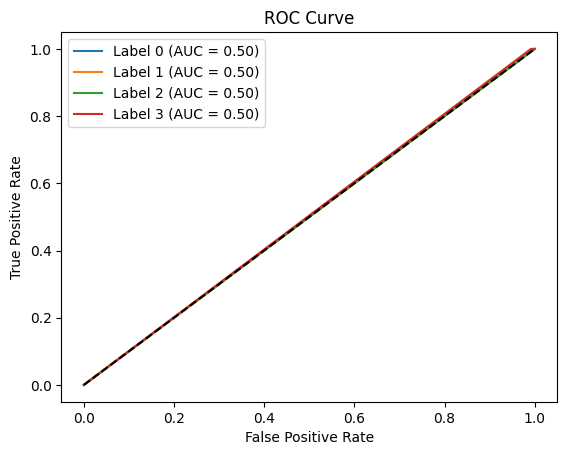

In [ ]:
for i in range(num_labels):
    fpr, tpr, _ = roc_curve(y_test_combined.values[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Label {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## If i change the label to credible/not credible

In [213]:
data.head()

,Unnamed: 0,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label
0,0,bild,https://www.bild.de/politik/inland/politik-inl...,"spd, fdp, umweltschutz, christian lindner",2024-02-01,2024-02-01,2024-10-20,NaN,BILD,"FDP, die Gruenen, SPD, Lindner Christian, Djir...",Naechster Ampel-Zoff: FDP stoppt Lieferketten-...,Naechster Keil zwischen den Ampel-Parteien! Zw...,Naechster Keil zwischen den Ampel-Parteien! D...,0.0,0.0,0.0,1.0,2326.0,False
1,1,bild,https://www.bild.de/politik/inland/politik-inl...,"migration, rki, spd, cdu",2022-06-18,2022-06-18,2024-10-20,"Oliver Grothmann, Stephan Kuerthy, Michael Eng...",NaN,"Berlin, Organisiertes Verbrechen, Bushido, Ras...",Aufschrei der Anstaendigen - Jetzt sprechen di...,"Es reicht das sagen immer mehr von denen, die...",Es rumort unter Deutschlands Buergern. Es rei...,0.0,1.0,1.0,0.0,4146.0,False
2,2,bild,https://www.bild.de/politik/inland/politik-inl...,"spd, inflation, cdu",2023-05-11,2023-05-11,2024-10-20,Karina Moessbauer,NaN,"Bundeswehr, texttospeech",Verteidigungsministerium sieht kein Problem: B...,Die Bundeswehr bestellt neue Loeschfahrzeuge ...,"Verteidigungsminister Boris Pistorius (63, SPD...",0.0,0.0,0.0,1.0,2497.0,False
3,3,bild,https://www.bild.de/politik/inland/politik-inl...,"migration, integration, grenzen, spd, cdu",2023-04-08,2023-04-08,2024-10-20,Zara Riffler und Daniela Pfad,NaN,"innenministerium, Politik, Politik-Inland, mig...",Faeser riskiert den Zusammenhalt! Landraete-Au...,Nachdem die Bundesinnenministerin sich gegen m...,Wirbel um Aussagen von Bundesinnenministerin N...,0.0,0.0,0.0,1.0,3806.0,False
4,4,bild,https://www.bild.de/politik/kolumnen/kolumne/s...,"spd, verschwoerungstheorien, olaf scholz",2022-04-18,2022-04-18,2024-10-20,Paul Ronzheimer,NaN,"Russland, Ukraine, putin wladimir, Scholz Olaf...","Kommentar: Schweigen zu Kreml-Gerd, Wut auf Bo...","Die SPD schweigt zu Gerhard Schroeder, ist abe...",Die kalte Selbstgerechtigkeit einiger SPD-Poli...,0.0,0.0,1.0,1.0,2642.0,False


In [214]:
data["Not credible"] = (
    ((data["Fake News"] == 1) | (data["Extreme bias"] == 1) | (data["clickbait"] == 1))
    & (data["credible"] != 1)
).astype(int)

data.head()

,Unnamed: 0,news_outlet,provenance,query_keywords,creation_date,last_modified,crawl_date,author_person,author_organization,news_keywords,title,description,body,Fake News,Extreme bias,clickbait,credible,body_len,has_label,Not credible
0,0,bild,https://www.bild.de/politik/inland/politik-inl...,"spd, fdp, umweltschutz, christian lindner",2024-02-01,2024-02-01,2024-10-20,NaN,BILD,"FDP, die Gruenen, SPD, Lindner Christian, Djir...",Naechster Ampel-Zoff: FDP stoppt Lieferketten-...,Naechster Keil zwischen den Ampel-Parteien! Zw...,Naechster Keil zwischen den Ampel-Parteien! D...,0.0,0.0,0.0,1.0,2326.0,False,0
1,1,bild,https://www.bild.de/politik/inland/politik-inl...,"migration, rki, spd, cdu",2022-06-18,2022-06-18,2024-10-20,"Oliver Grothmann, Stephan Kuerthy, Michael Eng...",NaN,"Berlin, Organisiertes Verbrechen, Bushido, Ras...",Aufschrei der Anstaendigen - Jetzt sprechen di...,"Es reicht das sagen immer mehr von denen, die...",Es rumort unter Deutschlands Buergern. Es rei...,0.0,1.0,1.0,0.0,4146.0,False,1
2,2,bild,https://www.bild.de/politik/inland/politik-inl...,"spd, inflation, cdu",2023-05-11,2023-05-11,2024-10-20,Karina Moessbauer,NaN,"Bundeswehr, texttospeech",Verteidigungsministerium sieht kein Problem: B...,Die Bundeswehr bestellt neue Loeschfahrzeuge ...,"Verteidigungsminister Boris Pistorius (63, SPD...",0.0,0.0,0.0,1.0,2497.0,False,0
3,3,bild,https://www.bild.de/politik/inland/politik-inl...,"migration, integration, grenzen, spd, cdu",2023-04-08,2023-04-08,2024-10-20,Zara Riffler und Daniela Pfad,NaN,"innenministerium, Politik, Politik-Inland, mig...",Faeser riskiert den Zusammenhalt! Landraete-Au...,Nachdem die Bundesinnenministerin sich gegen m...,Wirbel um Aussagen von Bundesinnenministerin N...,0.0,0.0,0.0,1.0,3806.0,False,0
4,4,bild,https://www.bild.de/politik/kolumnen/kolumne/s...,"spd, verschwoerungstheorien, olaf scholz",2022-04-18,2022-04-18,2024-10-20,Paul Ronzheimer,NaN,"Russland, Ukraine, putin wladimir, Scholz Olaf...","Kommentar: Schweigen zu Kreml-Gerd, Wut auf Bo...","Die SPD schweigt zu Gerhard Schroeder, ist abe...",Die kalte Selbstgerechtigkeit einiger SPD-Poli...,0.0,0.0,1.0,1.0,2642.0,False,0


In [215]:
len(data)

5109

In [216]:
X = data[["title", "description", "body"]].apply(
    lambda row: " ".join(row.values.astype(str)), axis=1
)
y = data[["Not credible", "credible"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [217]:
labels = ["Not credible", "credible"]

In [218]:
y_train[labels].sum()

Not credible     241.0
credible        3775.0
dtype: float64

In [219]:
y_test[labels].sum()

Not credible     76.0
credible        923.0
dtype: float64

In [220]:
vectorizer = TfidfVectorizer(max_features=3000)  # must be same as val features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [221]:
input_shape = X_train_tfidf.shape[1]
num_labels = y_train.shape[1]

# model architecture
model = Sequential(
    [
        Dense(1024, input_shape=(input_shape,), activation="relu"),
        Dropout(0.5),
        Dense(512, activation="relu"),
        Dropout(0.3),
        Dense(256, activation="relu"),
        Dropout(0.3),
        Dense(num_labels, activation="sigmoid"),
    ]
)

# compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.00001),
    metrics=["accuracy"],
)

early_stopping = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

# model summary
model.summary()
history = model.fit(
    X_train_tfidf.toarray(),
    y_train.values,
    epochs=100,
    validation_split=0.4,
    callbacks=[early_stopping],
)

c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 1024)           │     3,073,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,729,666 (14.23 MB)

 Trainable params: 3,729,666 (14.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7514 - loss: 0.6850 - val_accuracy: 0.9309 - val_loss: 0.6622
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9192 - loss: 0.6507 - val_accuracy: 0.9309 - val_loss: 0.6115
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9213 - loss: 0.5932 - val_accuracy: 0.9309 - val_loss: 0.5257
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9230 - loss: 0.5032 - val_accuracy: 0.9309 - val_loss: 0.4100
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9261 - loss: 0.3853 - val_accuracy: 0.9309 - val_loss: 0.3103
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9195 - loss: 0.3108 - val_accuracy: 0.9309 - val_loss: 0.2623
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9109 - loss: 0.2895 - val_accuracy: 0.9309 - val_loss: 0.2433
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9161 - loss: 0.2682 - val_accuracy: 0.

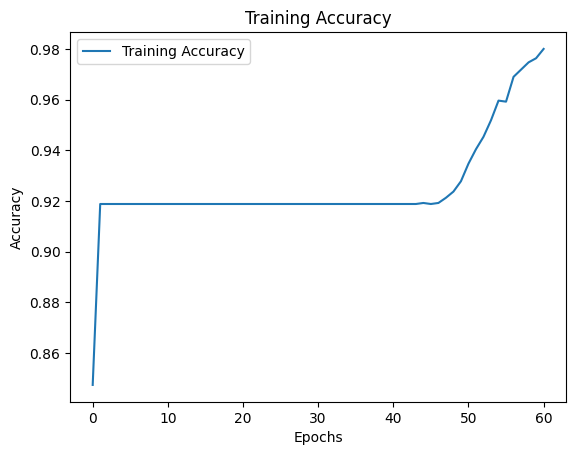

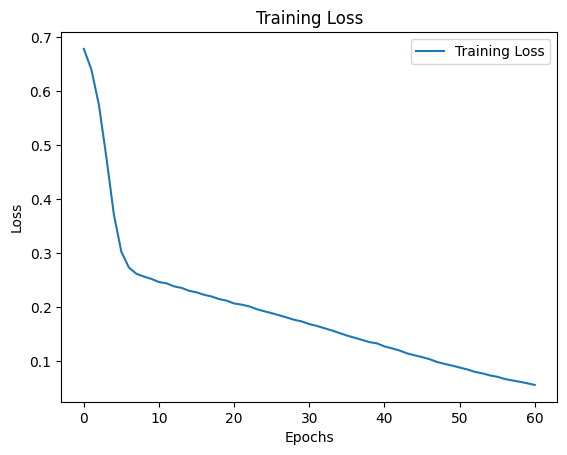

In [222]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Training Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [223]:
test_loss, test_accuracy = model.evaluate(X_test_tfidf.toarray(), y_test.values)
print(f"Test Accuracy= {round(test_accuracy,2)*100}%\n Test Loss= {round(test_loss,2)}")
test_pred = model.predict(X_test_tfidf.toarray())
report = classification_report(y_test.values, (test_pred > 0.5).astype(int))
print(report)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9139 - loss: 0.1992
Test Accuracy= 91.0%
 Test Loss= 0.21
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        76
           1       0.91      1.00      0.95       923

   micro avg       0.91      0.93      0.92       999
   macro avg       0.96      0.52      0.51       999
weighted avg       0.92      0.93      0.89       999
 samples avg       0.91      0.91      0.91       999



c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
roc_auc = roc_auc_score(y_test.values, test_pred, average="micro")
print(f"ROC-AUC (Micro Average): {roc_auc}")

ROC-AUC (Micro Average): 0.979947411526359


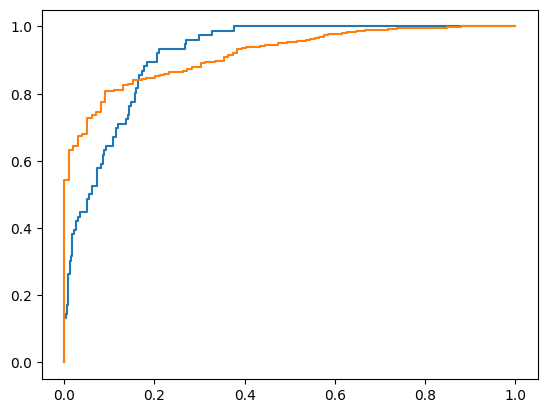

In [ ]:
for i in range(num_labels):
    fpr, tpr, _ = roc_curve(y_test.values[:, i], test_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Label {i} (AUC = {roc_auc:.2f})")

C:\Users\hanna\AppData\Local\Temp\ipykernel_23984\2941030100.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


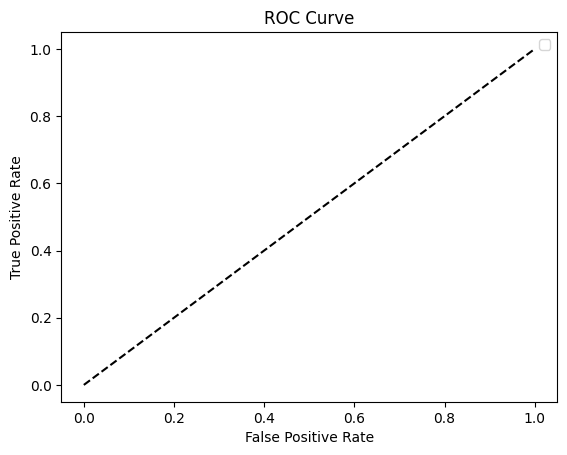

In [226]:
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

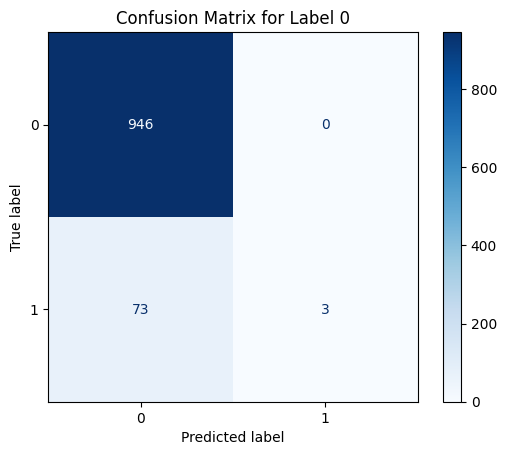

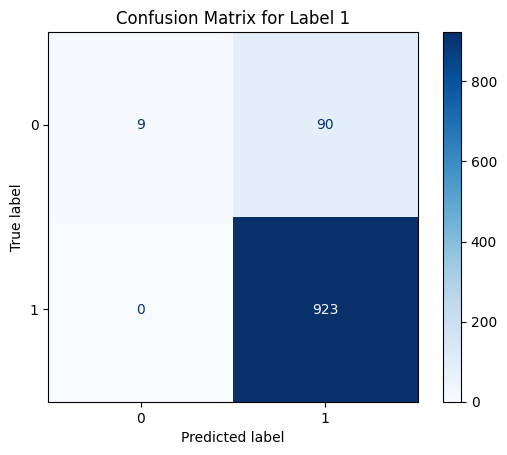

In [ ]:
cm = multilabel_confusion_matrix(y_test.values, (test_pred > 0.5).astype(int))

for i, matrix in enumerate(cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[0, 1])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for Label {i}")
    plt.show()